https://seaborn.pydata.org/tutorial/regression.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "regression")))

In [5]:
tips = sns.load_dataset("tips")

## Functions to draw linear regression models

https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot

In [ ]:
# Plot data and a linear regression model fit.

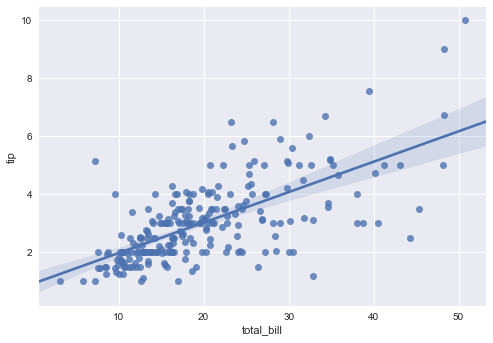

In [6]:
sns.regplot(x="total_bill", y="tip", data=tips);

https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot

In [ ]:
# Plot data and regression model fits across a FacetGrid.

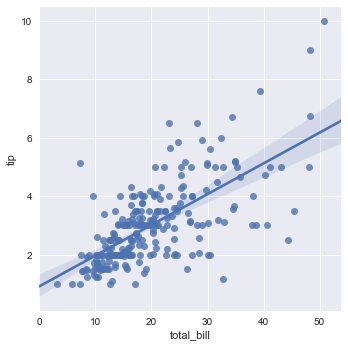

In [7]:
sns.lmplot(x="total_bill", y="tip", data=tips);

In [ ]:
# with discrete values

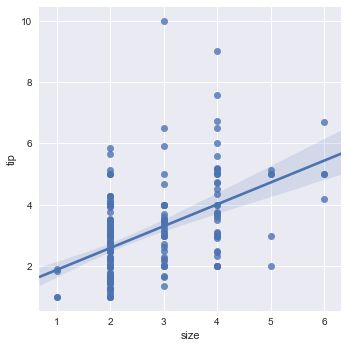

In [8]:
sns.lmplot(x="size", y="tip", data=tips);

In [ ]:
# One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 
# Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

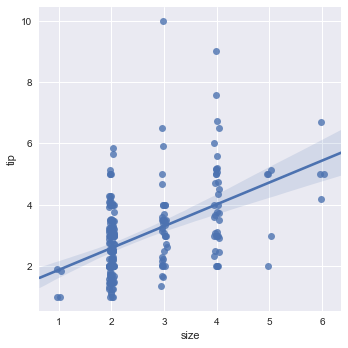

In [9]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

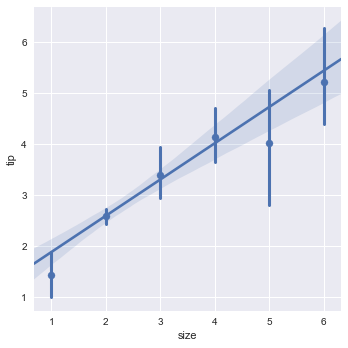

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting different kinds of models

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [11]:
anscombe = sns.load_dataset("anscombe")

In [ ]:
# in the first dataset, the linear regression is a good model

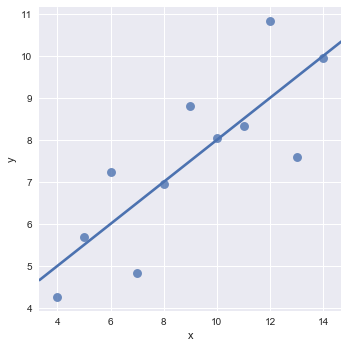

In [12]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

In [ ]:
# in the second dataset is the same, but the plot clearly shows that this is not a good model

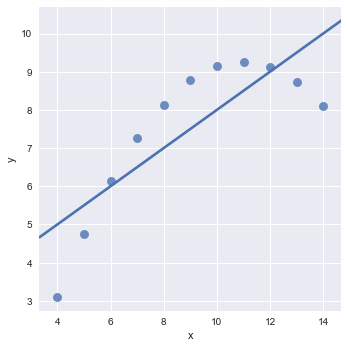

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

In [ ]:
# lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset

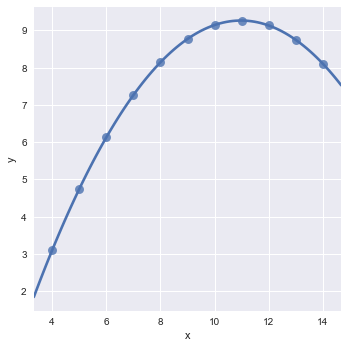

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

In [ ]:
# outlier

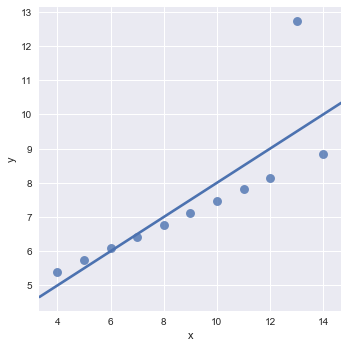

In [15]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

In [ ]:
# it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals

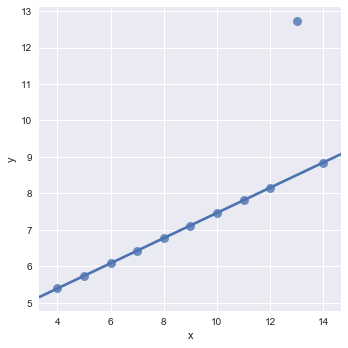

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

In [ ]:
# When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

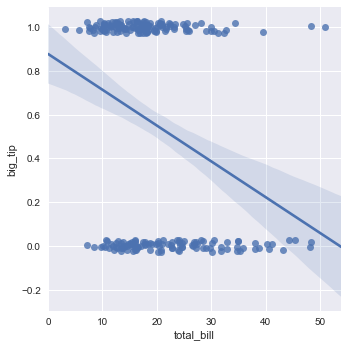

In [17]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

In [ ]:
# The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

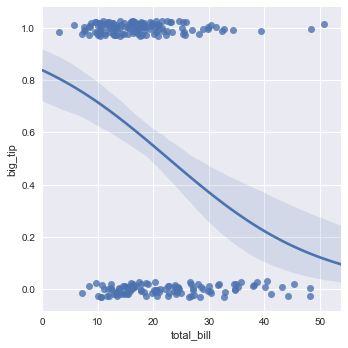

In [18]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

In [ ]:
# An altogether different approach is to fit a nonparametric regression using a lowess smoother. 
# This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

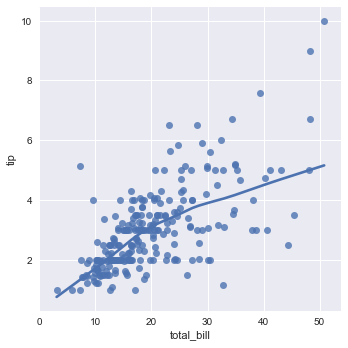

In [19]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

In [ ]:
# The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. 
# It fits and removes a simple linear regression and then plots the residual values for each observation. 
# Ideally, these values should be randomly scattered around y = 0

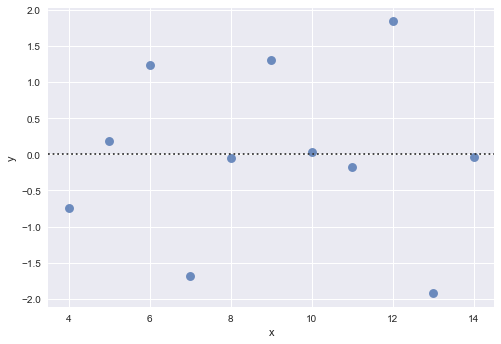

In [20]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

In [ ]:
# If there is structure in the residuals, it suggests that simple linear regression is not appropriate

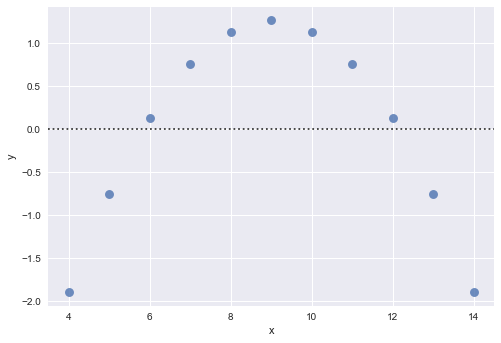

In [21]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables

In [ ]:
# The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them

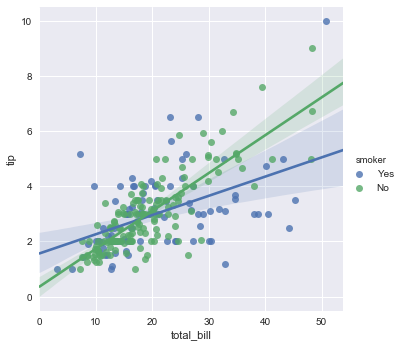

In [22]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In [ ]:
# It’s possible to use different scatterplot markers to make plots the reproduce to black and white better. 
# You also have full control over the colors used:

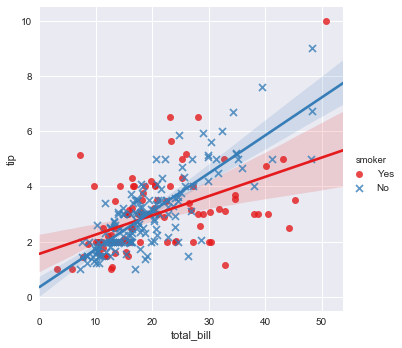

In [23]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

In [ ]:
# To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid:

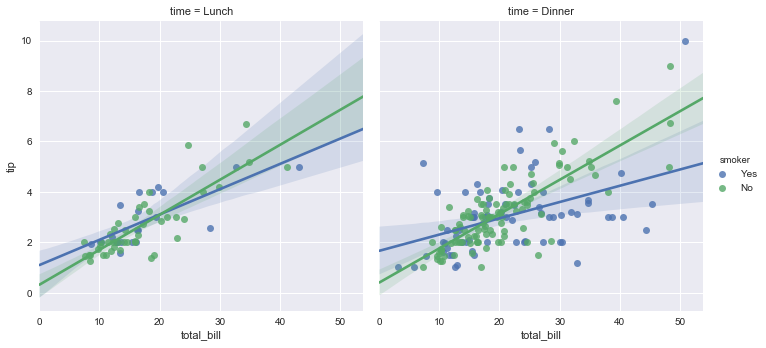

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

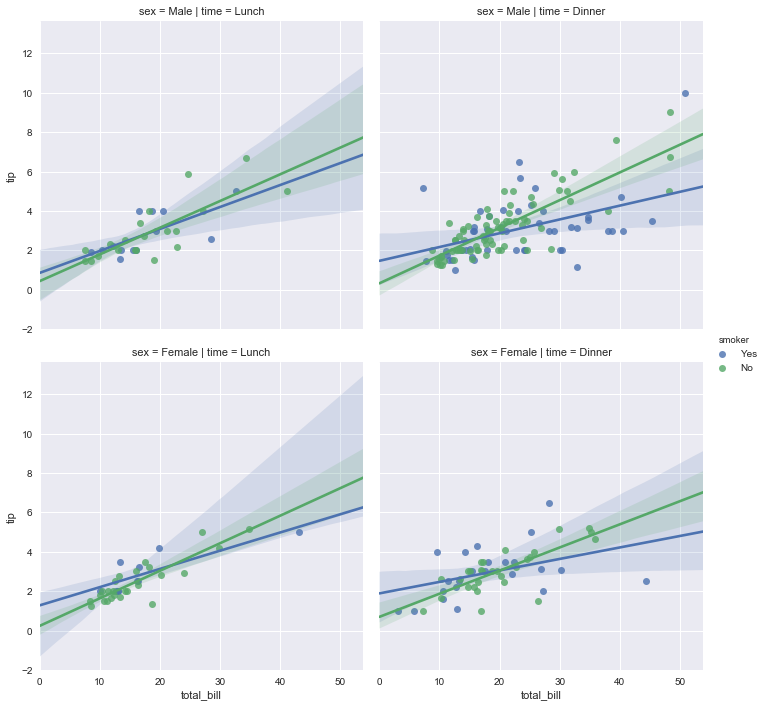

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## Controlling the size and shape of the plot

In [ ]:
# To control the size, you need to create a figure object yourself.

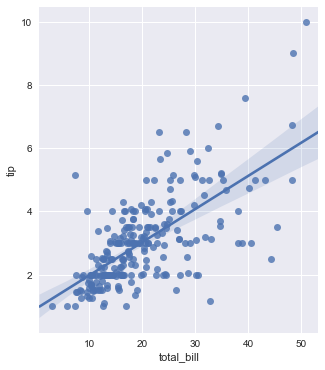

In [26]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

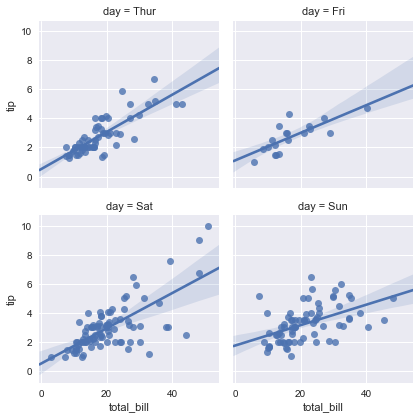

In [27]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

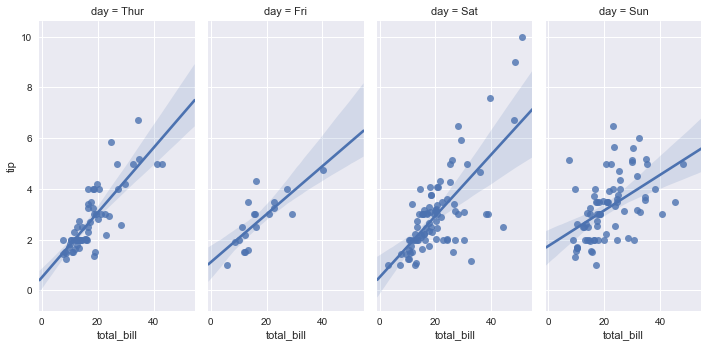

In [28]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## Plotting a regression in other contexts

https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot

In [ ]:
# Using the pairplot() function with kind="reg" combines regplot() and PairGrid to show the linear relationship between variables in a dataset.

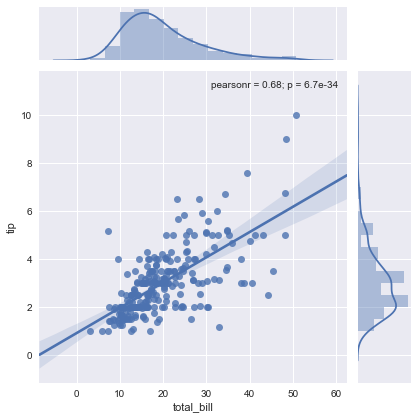

In [29]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid

In [ ]:
# the two axes don’t show the same relationship conditioned on two levels of a third variable; 
# rather, PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset

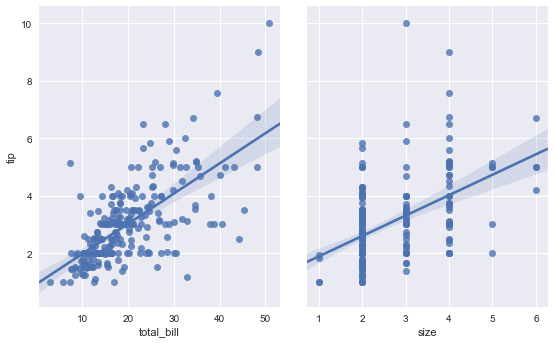

In [30]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

In [ ]:
# conditioning on an additional categorical variable is built into pairplot() using the hue parameter

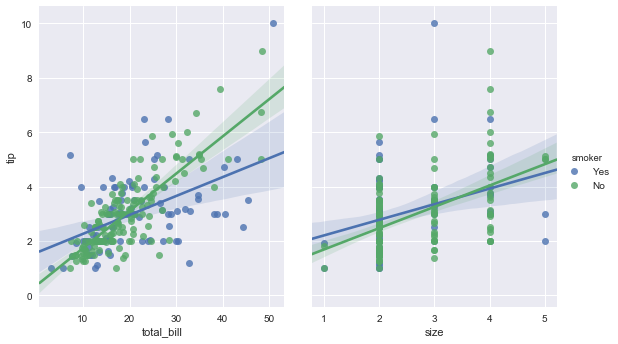

In [31]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");